In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 유입 분석

- Unique visitor - 유일 방문자 수 계산
- DAU (Daily Active User)
- WAU (Weekly Active User)
- MAU (Monthly Active User)
- NRU : 하루 단위로 방문한 신규 고객 고유의 수 측정
- TTS : 고객 별 체류 시간

In [ ]:
df = pd.read_csv('/content/processed_data.csv')
df.shape

(885129, 17)

In [ ]:
df = pd.read_csv('/content/processed_data.csv')
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')
df['date'] = df['event_time'].dt.date

df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,hour,main_category,sub_category,sub_sub_category,date
0,0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,11,electronics,telephone,NaN,2020-09-24
1,1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,11,computers,components,cooler,2020-09-24
2,2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,11,NaN,NaN,NaN,2020-09-24
3,3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,11,computers,peripherals,printer,2020-09-24
4,4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,11,NaN,NaN,NaN,2020-09-24


In [ ]:
df.shape

(885129, 18)

In [ ]:
# 신규 유저 정보 테이블 생성

first_df = df.groupby('user_id')['date'].min().reset_index()

first_df.columns = ['user_id', 'first_date']

first_df['first_date'] = pd.to_datetime(first_df['first_date'])
first_df['day'] = first_df['first_date'].dt.day
first_df['week'] = first_df['first_date'].dt.isocalendar().week
first_df['year'] = first_df['first_date'].dt.isocalendar().year
first_df['month_year'] = first_df['first_date'].dt.to_period('M')

first_df.head(10)

,user_id,first_date,day,week,year,month_year
0,1515915625353226922,2020-10-29,29,44,2020,2020-10
1,1515915625353230067,2020-10-06,6,41,2020,2020-10
2,1515915625353230683,2020-11-09,9,46,2020,2020-11
3,1515915625353230922,2020-10-02,2,40,2020,2020-10
4,1515915625353234047,2020-09-29,29,40,2020,2020-09
5,1515915625353236157,2021-02-04,4,5,2021,2021-02
6,1515915625353238403,2020-10-16,16,42,2020,2020-10
7,1515915625353262977,2020-09-25,25,39,2020,2020-09
8,1515915625353271890,2020-10-05,5,41,2020,2020-10
9,1515915625353286099,2020-10-03,3,40,2020,2020-10


In [ ]:
# 세션 정보 테이블 생성 및 기존 데이터와 병합

session_times = df.groupby('user_session')['event_time'].agg(['min', 'max']).reset_index()
session_times['session_duration'] = (session_times['max'] - session_times['min']).dt.total_seconds()

session_times[session_times['session_duration'] == 0]

session_df = df.merge(session_times, how='left', on='user_session')
session_df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,...,hour,main_category,sub_category,sub_sub_category,date,week,month_year,min,max,session_duration
0,0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,...,11,electronics,telephone,NaN,2020-09-24,39,2020-09,2020-09-24 11:57:06+00:00,2020-09-24 11:57:06+00:00,0.0
1,1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,...,11,computers,components,cooler,2020-09-24,39,2020-09,2020-09-24 11:57:26+00:00,2020-09-24 12:19:57+00:00,1351.0
2,2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,...,11,NaN,NaN,NaN,2020-09-24,39,2020-09,2020-09-24 11:57:27+00:00,2020-09-24 11:57:27+00:00,0.0
3,3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,...,11,computers,peripherals,printer,2020-09-24,39,2020-09,2020-09-24 11:57:33+00:00,2020-09-24 11:57:33+00:00,0.0
4,4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,...,11,NaN,NaN,NaN,2020-09-24,39,2020-09,2020-09-24 11:57:36+00:00,2020-09-24 11:57:36+00:00,0.0


In [ ]:
# DAU / WAU / MAU
# 기간 별 고유 유저 수

def au(
    data, duration, vis=False
):

  if duration == 'day':
    au = data.groupby(['month','day'])['user_id'].nunique().reset_index()

  elif duration == 'week':
    data['week'] = data['event_time'].dt.isocalendar().week
    au = data.groupby(['year', 'week'])['user_id'].nunique().reset_index()
    au.columns = ['year', 'week', 'WAU']

  else: # month
    data['month_year'] = data['event_time'].dt.to_period('M')
    au = data.groupby('month_year')['user_id'].nunique().reset_index()
    au.columns = ['month_year', 'MAU']

  if vis :
    print('hello')

  else:
    return au

DAU = au(df, 'day')
WAU = au(df, 'week')
MAU = au(df, 'month')

DAU

<ipython-input-52-c32bf3f6ff7e>:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['month_year'] = data['event_time'].dt.to_period('M')


,month,day,user_id
0,1,1,1804
1,1,2,2180
2,1,3,2629
3,1,4,2774
4,1,5,2757
...,...,...,...
153,12,27,2502
154,12,28,2909
155,12,29,2418
156,12,30,2296


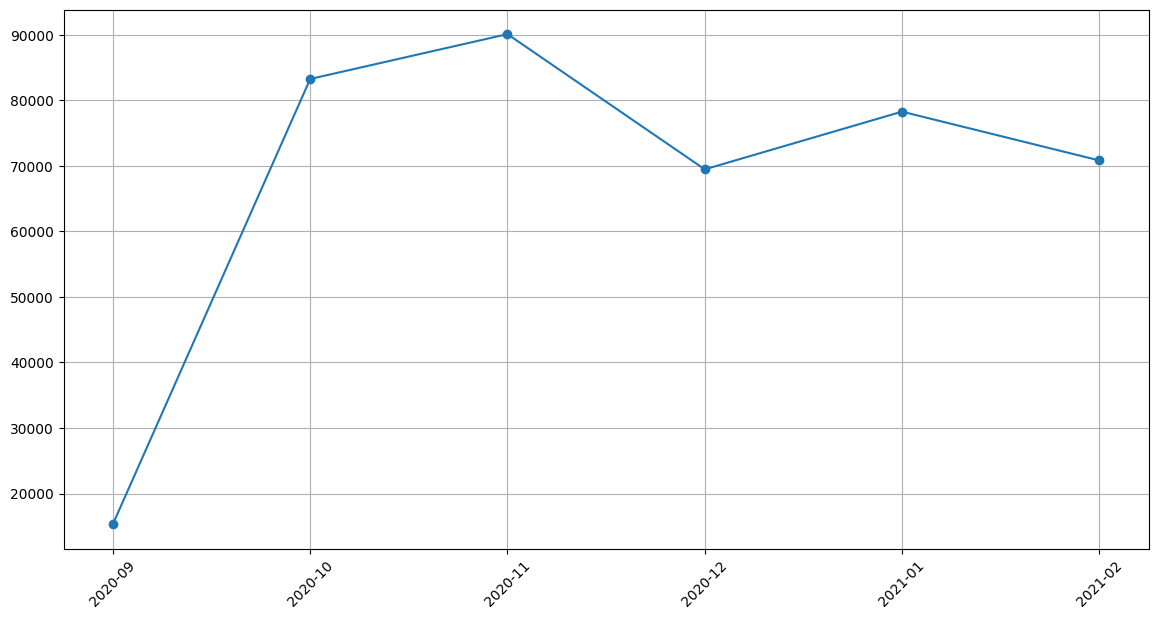

,year,week,new_users_per_week
0,2020,39,7691
1,2020,40,16563
2,2020,41,15982
3,2020,42,19143
4,2020,43,21095
5,2020,44,20860
6,2020,45,22133
7,2020,46,22667
8,2020,47,23540
9,2020,48,16596


In [ ]:
# NRU
# 일정 단위로 방문한 신규 유저 수

def nru(
    duration, vis=False
):
  if duration == 'week':
    nu = first_df.groupby(['year', 'week'])['user_id'].nunique().reset_index()
    nu.columns = ['year', 'week', 'new_users_per_week']

  elif duration == 'month':
    nu = first_df.groupby('month_year')['user_id'].nunique().reset_index()
    nu.columns = ['month_year', 'new_users_per_month']

  else:
    None

  if vis:
    plt.figure(figsize=(14, 7))

    if duration == 'week':
      plt.plot(nu['year'].astype(str) + '-' + nu['week'].astype(str),
      nu['new_users_per_week'], marker='o', linestyle='-')
      plt.xticks(rotation=45)
      plt.grid(True)
      plt.show()

    elif duration == 'month':
      plt.plot(nu['month_year'].astype(str),
      nu['new_users_per_month'], marker='o', linestyle='-')
      plt.xticks(rotation=45)
      plt.grid(True)
      plt.show()

  else:
    return nu


NRU_week = nru('week')
NRU_month = nru('month', vis=True)

NRU_week

In [ ]:
# TTS
# 고객 별 체류 시간



In [ ]:
# 세션 및 시간 파악 with 선혜님 코드

# 0초 세션 확인

session_times = df.groupby('user_session')['event_time'].agg(['min', 'max']).reset_index()
session_times['session_duration'] = (session_times['max'] - session_times['min']).dt.total_seconds()

session_times[session_times['session_duration'] == 0]

,user_session,min,max,session_duration
0,000AMhYaQu,2021-01-31 20:27:14+00:00,2021-01-31 20:27:14+00:00,0.0
1,000c34fa-991f-442a-8e07-8c472269bec6,2020-09-30 17:52:02+00:00,2020-09-30 17:52:02+00:00,0.0
2,001HttdHUk,2021-01-09 23:35:49+00:00,2021-01-09 23:35:49+00:00,0.0
4,001RxUtFJa,2020-12-29 04:50:33+00:00,2020-12-29 04:50:33+00:00,0.0
5,002DmERG1w,2020-09-26 18:59:06+00:00,2020-09-26 18:59:06+00:00,0.0
...,...,...,...,...
490392,zzxnA0nWEY,2020-11-17 11:34:14+00:00,2020-11-17 11:34:14+00:00,0.0
490393,zzxngTdVaG,2021-02-15 13:27:42+00:00,2021-02-15 13:27:42+00:00,0.0
490394,zzy0qXtxYX,2020-11-08 17:08:01+00:00,2020-11-08 17:08:01+00:00,0.0
490395,zzy6W7KylP,2020-12-27 11:51:44+00:00,2020-12-27 11:51:44+00:00,0.0


0 sec 세션 : 350059, 0 이상 세션 : 140339


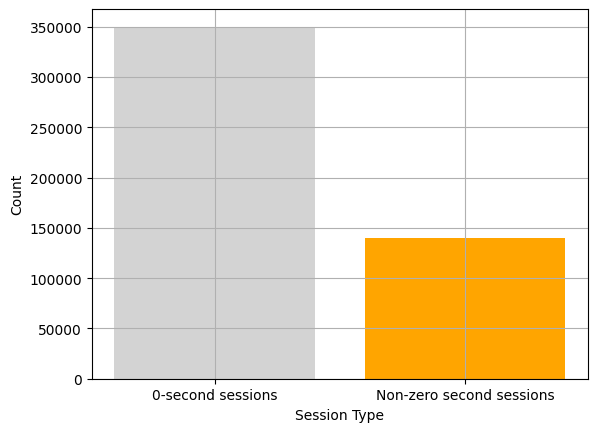

In [ ]:
zero = session_times[session_times["session_duration"] == 0].shape[0]
non_zero = session_times[session_times["session_duration"] > 0].shape[0]

print(f'0 sec 세션 : {zero}, 0 이상 세션 : {non_zero}')

labels = ['0-second sessions', 'Non-zero second sessions']
counts = [zero, non_zero]

plt.bar(labels, counts, color=['lightgrey', 'orange'])
plt.xlabel('Session Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
# 0초 세션의 주요 행동들

session_df = df.merge(session_times, how='left', on='user_session')
session_df.head()

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,...,hour,main_category,sub_category,sub_sub_category,date,week,month_year,min,max,session_duration
0,0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,...,11,electronics,telephone,NaN,2020-09-24,39,2020-09,2020-09-24 11:57:06+00:00,2020-09-24 11:57:06+00:00,0.0
1,1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,...,11,computers,components,cooler,2020-09-24,39,2020-09,2020-09-24 11:57:26+00:00,2020-09-24 12:19:57+00:00,1351.0
2,2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,...,11,NaN,NaN,NaN,2020-09-24,39,2020-09,2020-09-24 11:57:27+00:00,2020-09-24 11:57:27+00:00,0.0
3,3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,...,11,computers,peripherals,printer,2020-09-24,39,2020-09,2020-09-24 11:57:33+00:00,2020-09-24 11:57:33+00:00,0.0
4,4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,...,11,NaN,NaN,NaN,2020-09-24,39,2020-09,2020-09-24 11:57:36+00:00,2020-09-24 11:57:36+00:00,0.0


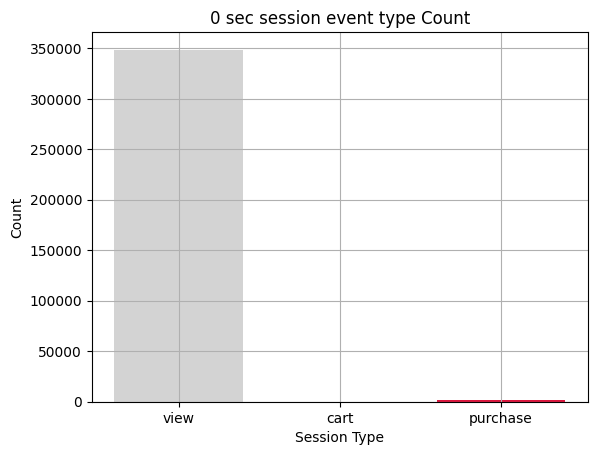

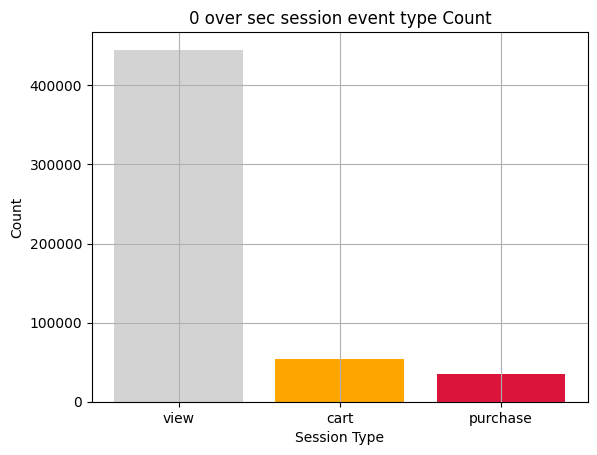

In [ ]:
session_0sec = session_df[session_df['session_duration'] == 0]
session_0over = session_df[session_df['session_duration'] > 0]

sec0 = session_0sec['event_type'].value_counts()
sec1 = session_0over['event_type'].value_counts()


labels = ['view', 'cart', 'purchase']
counts = [sec0['view'], sec0['cart'], sec0['purchase']]


plt.bar(labels, counts, color=['lightgrey', 'orange', 'crimson'])
plt.title('0 sec session event type Count')
plt.xlabel('Session Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()


labels = ['view', 'cart', 'purchase']
counts = [sec1['view'], sec1['cart'], sec1['purchase']]


plt.bar(labels, counts, color=['lightgrey', 'orange', 'crimson'])
plt.title('0 over sec session event type Count')
plt.xlabel('Session Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()

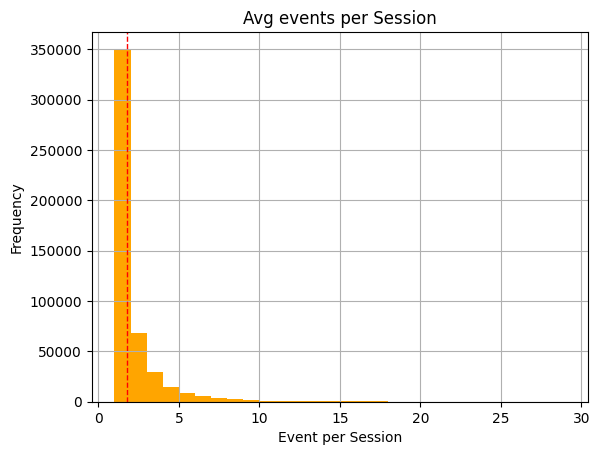

In [ ]:
# 세션 별 이벤트 갯수

session_cnt = df.groupby('user_session').size().reset_index(name='event_count')

# 세션 별 평균 이벤트 갯수

session_len = session_cnt['event_count'].mean()



# 세션 별 이벤트 갯수 시각화

plt.hist(session_cnt['event_count'], bins=range(1, 30), color='orange')
plt.axvline(session_len, color='red', linestyle='dashed', linewidth=1)

plt.xlabel('Event per Session')
plt.ylabel('Frequency')
plt.title('Avg events per Session')
plt.grid(True)
plt.show()


# 세션 별 평균 시간 시각화



#재방문 분석

- 일정 기간 단위 이탈율 : 일정 기간 단위로 재 방문 여부를 측정
- 범위 리텐션(한 달 내 이벤트 발생에 근거) → 코호트별 차이
- 인게이지먼트(DAU/MAU)


In [ ]:
# 3일 7일 30일 단위 리텐션

df = pd.merge(df, first, on='user_id', how='left')

retention_periods = [1, 7, 30]

data_7day = df.copy()

data_7day

MergeError: Passing 'suffixes' which cause duplicate columns {'year_x'} is not allowed.